## Developer's Salary Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

73268

In [2]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [4]:
# Extracting Columns that are being used for model training
df = df[["Country", "EdLevel", "YearsCodePro", "WorkExp", "Employment", "RemoteWork", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis = 1)

In [5]:
df.head()

,Country,EdLevel,YearsCodePro,WorkExp,Employment,RemoteWork,Salary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN,"Employed, full-time",Fully remote,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,NaN,"Employed, full-time","Hybrid (some remote, some in-person)",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,NaN,"Employed, full-time",Fully remote,215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,NaN,"Employed, full-time","Hybrid (some remote, some in-person)",NaN


In [6]:
# Remove missing / null data
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,WorkExp,Employment,RemoteWork,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,NaN,"Employed, full-time","Hybrid (some remote, some in-person)",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,NaN,"Employed, full-time",Fully remote,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,6.0,"Employed, full-time","Hybrid (some remote, some in-person)",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,NaN,"Employed, full-time","Hybrid (some remote, some in-person)",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,14.0,"Employed, full-time;Independent contractor, fr...",Fully remote,194400.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38071 entries, 2 to 73121
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   WorkExp       27103 non-null  float64
 4   Employment    38067 non-null  object 
 5   RemoteWork    38015 non-null  object 
 6   Salary        38071 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.3+ MB


In [8]:
df= df.dropna()
# Check if there's still null / missing data
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
WorkExp         0
Employment      0
RemoteWork      0
Salary          0
dtype: int64

In [9]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, part-time;Retired', 'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [10]:
# Filter only full time employees
df = df[df["Employment"] == "Employed, full-time"]
df= df.drop("Employment", axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23009 entries, 8 to 73120
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23009 non-null  object 
 1   EdLevel       23009 non-null  object 
 2   YearsCodePro  23009 non-null  object 
 3   WorkExp       23009 non-null  float64
 4   RemoteWork    23009 non-null  object 
 5   Salary        23009 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.2+ MB


In [12]:
df['RemoteWork'].unique()

array(['Hybrid (some remote, some in-person)', 'Fully remote',
       'Full in-person'], dtype=object)

In [13]:
# Get an overview of the countries of the developers are staying at
df['Country'].value_counts()

Country
United States of America                                5547
Germany                                                 1743
United Kingdom of Great Britain and Northern Ireland    1611
India                                                   1603
Canada                                                   883
                                                        ... 
Cape Verde                                                 1
Somalia                                                    1
Zambia                                                     1
Lao People's Democratic Republic                           1
Seychelles                                                 1
Name: count, Length: 152, dtype: int64

In [14]:
# Create a function to compile the countries with smaller values into "Others" categories
def compile_countries(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Others"
    return categorical_map

In [15]:
country_map = compile_countries(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)

In [16]:
df.Country.value_counts()

Country
Others                                                  7554
United States of America                                5547
Germany                                                 1743
United Kingdom of Great Britain and Northern Ireland    1611
India                                                   1603
Canada                                                   883
Brazil                                                   815
France                                                   741
Spain                                                    635
Netherlands                                              491
Italy                                                    479
Australia                                                470
Poland                                                   437
Name: count, dtype: int64

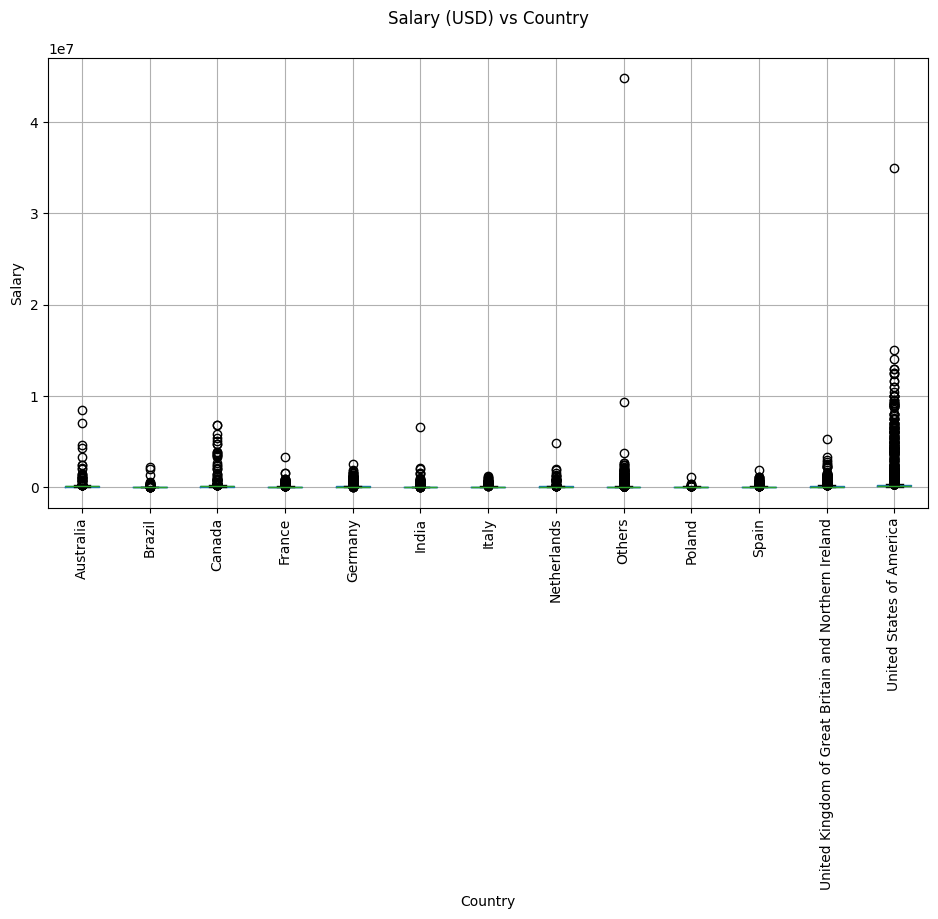

In [17]:
#Plot a boxplot to visualize the relationship between countries and salries and identify any possible outliers
plt.rcParams["figure.figsize"] = (11,6)
df.boxplot('Salary', 'Country')
plt.suptitle('Salary (USD) vs Country')
plt.title('')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [18]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Others"]

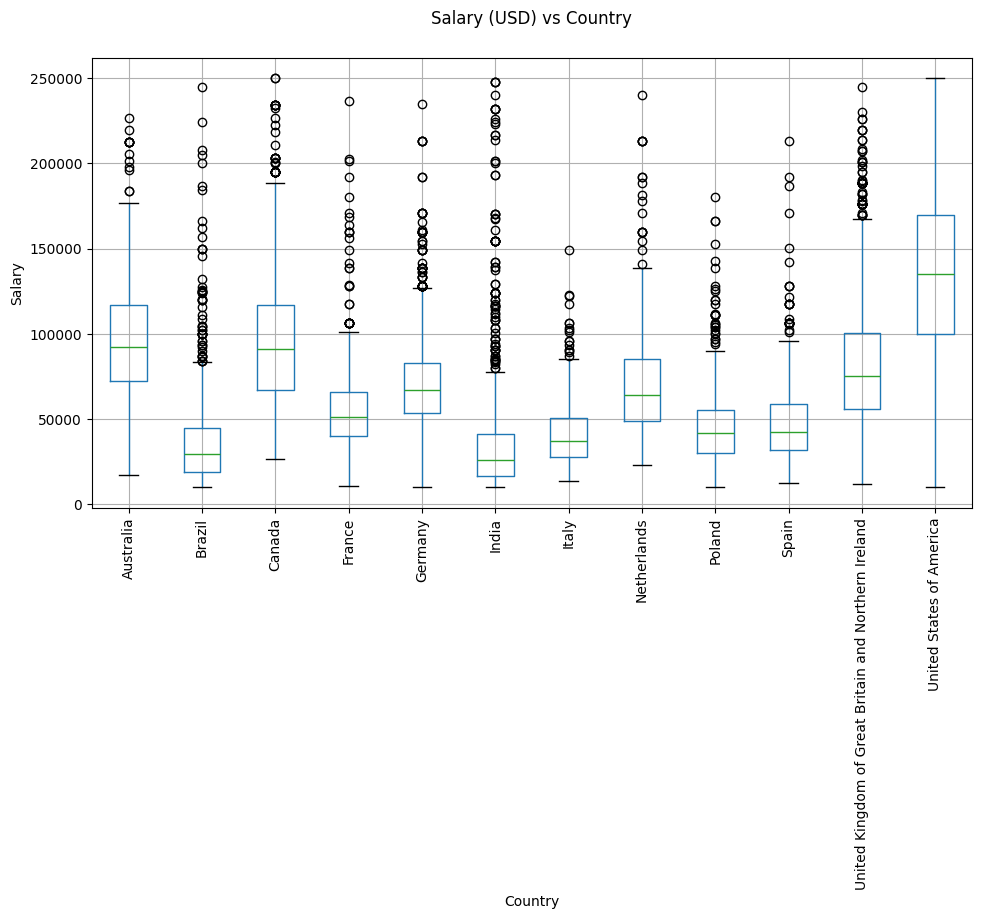

In [19]:
#Plot a boxplot to visualize the relationship between countries and salries and identify any possible outliers
plt.rcParams["figure.figsize"] = (11,6)
df.boxplot('Salary', 'Country')
plt.suptitle('Salary (USD) vs Country')
plt.title('')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [20]:
df["YearsCodePro"].unique()

array(['6', '5', '4', '20', '9', '14', '21', '25', '3', '10', '8', '2',
       '7', '19', '12', '1', '11', '15', '18', 'Less than 1 year', '46',
       '22', '23', '32', '17', '27', '16', '31', '34', '13', '24', '26',
       '42', '38', '35', '30', '28', '37', '41', '40', '29', '33', '36',
       '39', '48', '44', 'More than 50 years', '43', '49', '50', '45',
       '47'], dtype=object)

In [21]:
# Create a function to standardize and clean the coding experience column
# Convert Coding Experience Column into float data type
def clean_yearsCodePro(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [22]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_yearsCodePro)

In [23]:
df['WorkExp'].unique()

array([ 6.,  5.,  4., 23.,  9., 14., 21., 28.,  7.,  3., 12.,  8.,  2.,
       20., 27., 10., 19., 13., 15.,  1., 11., 18., 17., 46., 25., 31.,
       16., 22., 35., 24., 32.,  0., 26., 42., 38., 29., 30., 33., 40.,
       41., 44., 36., 34., 45., 43., 37., 50., 39., 47., 49., 48.])

In [24]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [25]:
# Clean education column into a few categories
def clean_edLevel(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Postgraduate"
    return "Less than a Bachelors"

In [26]:
df['EdLevel'] = df["EdLevel"].apply(clean_edLevel)

In [27]:
df['EdLevel'].unique()

array(["Master's degree", "Bachelor's degree", 'Less than a Bachelors',
       'Postgraduate'], dtype=object)

In [28]:
# Transform string values into a unique float value (so that the model could understand)
from sklearn.preprocessing import LabelEncoder
le_edLevel = LabelEncoder()
df['EdLevel'] = le_edLevel.fit_transform(df['EdLevel'])

In [29]:
df['EdLevel'].unique()

array([2, 0, 1, 3])

In [30]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

In [31]:
df['Country'].unique()

array([ 7, 11,  6,  2,  4,  8,  1,  3, 10,  9,  5,  0])

In [32]:
le_remoteWork = LabelEncoder()
df['RemoteWork'] = le_remoteWork.fit_transform(df['RemoteWork'])

In [33]:
df['RemoteWork'].unique()

array([2, 1, 0])

In [34]:
#Split dataset into features(x) and label(y)
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [35]:
#Split dataset into training & testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(x_test)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
linear_score=r2_score(y_test,y_pred)
print(linear_score)

0.3251427267360184


In [39]:
linear_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(linear_rmse)

46033.44937227651


In [40]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
y_pred = dec_tree_reg.predict(x_test)

In [42]:
dec_tree_score=r2_score(y_test,y_pred)
dec_tree_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(dec_tree_score)
print(dec_tree_rmse)

0.3998941667412408
43409.169429461625


In [43]:
from sklearn.ensemble import RandomForestRegressor
ran_forest_reg = RandomForestRegressor(random_state=0)
ran_forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [44]:
y_pred = ran_forest_reg.predict(x_test)

In [45]:
ran_forest_score=r2_score(y_test,y_pred)
ran_forest_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(ran_forest_score)
print(ran_forest_rmse)

0.5302057313063131
38407.97491461156


In [46]:
# Preparing the variables for plotting
x_labels = ["Linear Regression", "Decision Tree", "Random Forest"]
r2_scores = [linear_score, dec_tree_score, ran_forest_score]
rmses = [linear_rmse, dec_tree_rmse, ran_forest_rmse]
bar_pos = np.arange(len(x_labels)) # Position of the bars at x-axis 

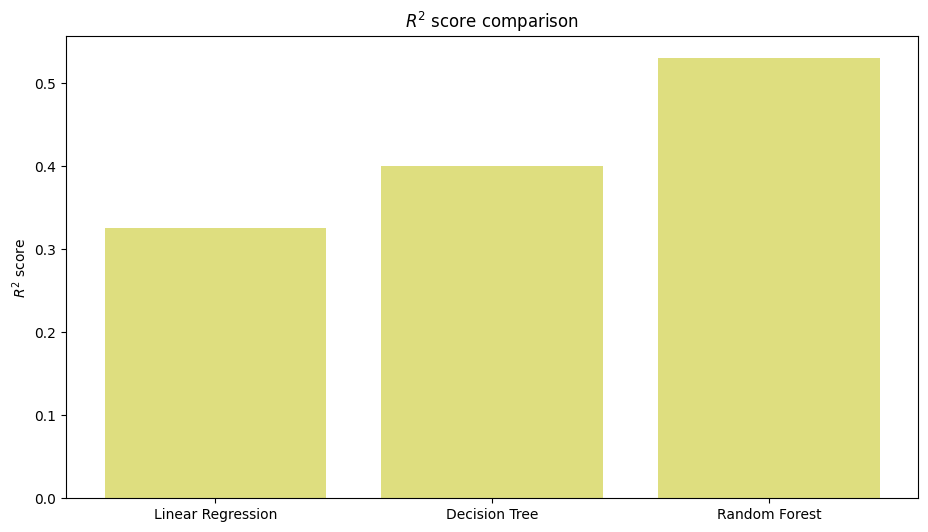

In [47]:
plt.bar(bar_pos, r2_scores, alpha=0.5,color='y')
plt.xticks(bar_pos, x_labels)
plt.ylabel("$R^2$ score")
plt.title("$R^2$ score comparison")
plt.show()

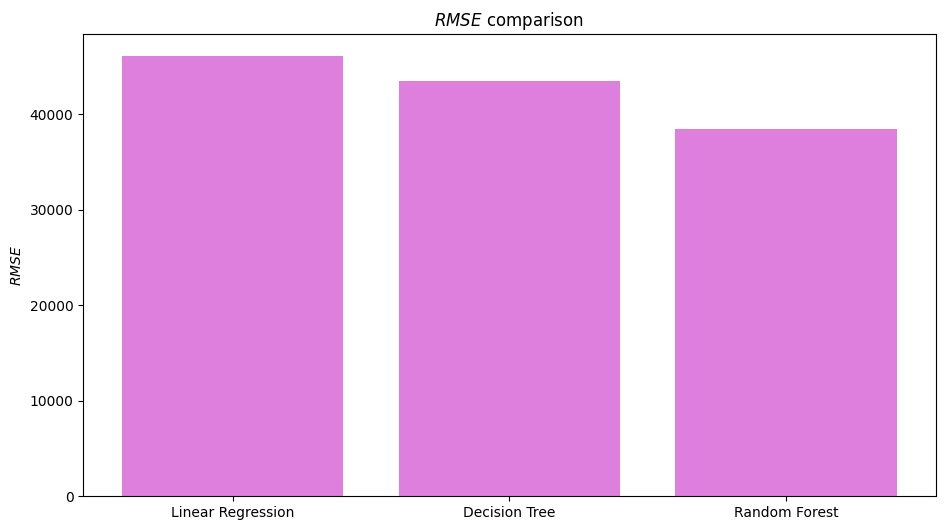

In [48]:
plt.bar(bar_pos, rmses, alpha=0.5, color='m')
plt.xticks(bar_pos, x_labels)
plt.ylabel("$RMSE$")
plt.title("$RMSE$ comparison")
plt.show()

In [49]:
import pickle

In [50]:
data = {"model":ran_forest_reg, "le_country":le_country, "le_edLevel":le_edLevel, "le_remoteWork":le_remoteWork}
# open a pickle file in write binary mode
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [51]:
# check our pickle file by opening the file in read binary mode
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_country = data['le_country']
le_edLevel = data['le_edLevel']
le_remoteWork = data['le_remoteWork']

In [52]:
y_pred = regressor_loaded.predict(x_test)
pred_score= r2_score(y_test,y_pred)
pred_score

0.5302057313063131